# California Housing Prices
### Median house prices for California districts derived from the 1990 census.
`Author:` [Syed Muhammad Ebad](https://www.kaggle.com/syedmuhammadebad)\
`Date:` 6-June-2024\
[Send me an email](mailto:mohammadebad1@hotmail.com)\
[Visit my GitHub profile](https://github.com/smebad)



[Link of the original dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

## About Dataset
`Context:`

This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

`Content:`

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

* longitude

* latitude

* housing_median_age

* total_rooms

* total_bedrooms

* population

* households

* median_income

* median_house_value

* ocean_proximity

`Acknowledgements:`

This data was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.


### 1. Importing Libraries

In [5]:
# Important Libraries to import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load the Dataset

In [6]:
df = pd.read_csv('housing.csv')
# Reviewing the dataset
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 3. Checking out the null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### 4. Dropping out the null values

In [8]:
# Dropping rows with missing values (NaN) from the DataFrame in place
df.dropna(inplace=True)
# Displaying concise summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


### 5. Train Test Split the data

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6. Exploratory Data Analysis

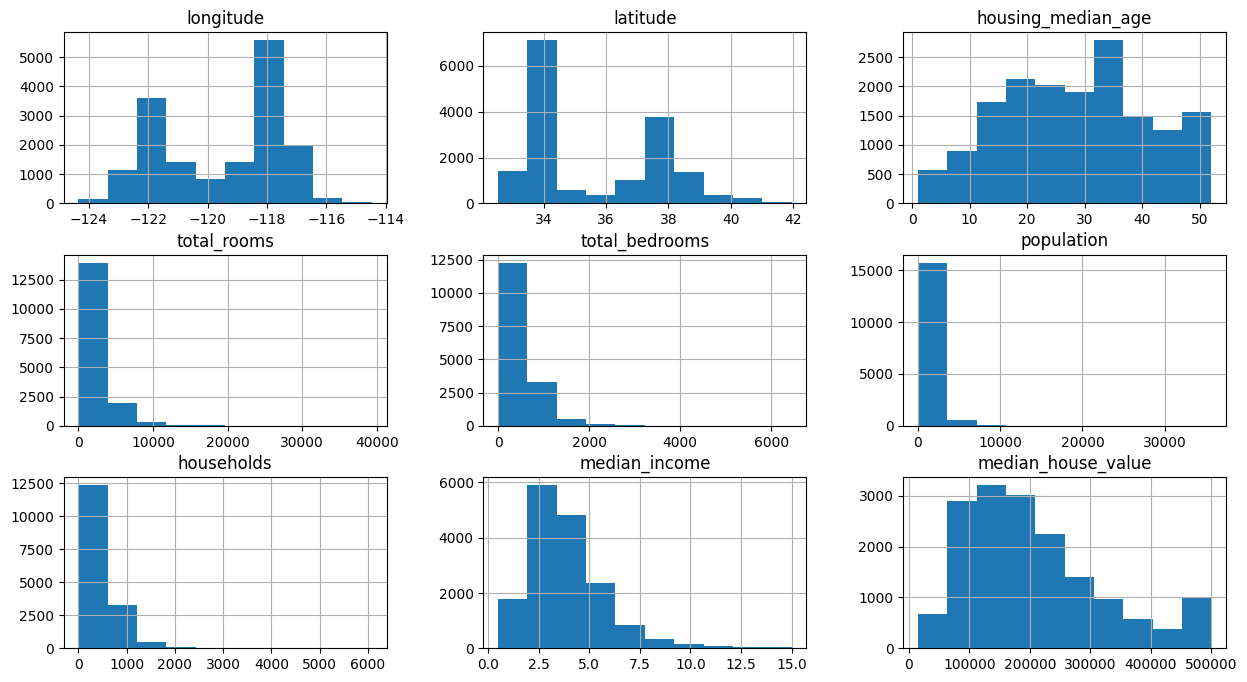

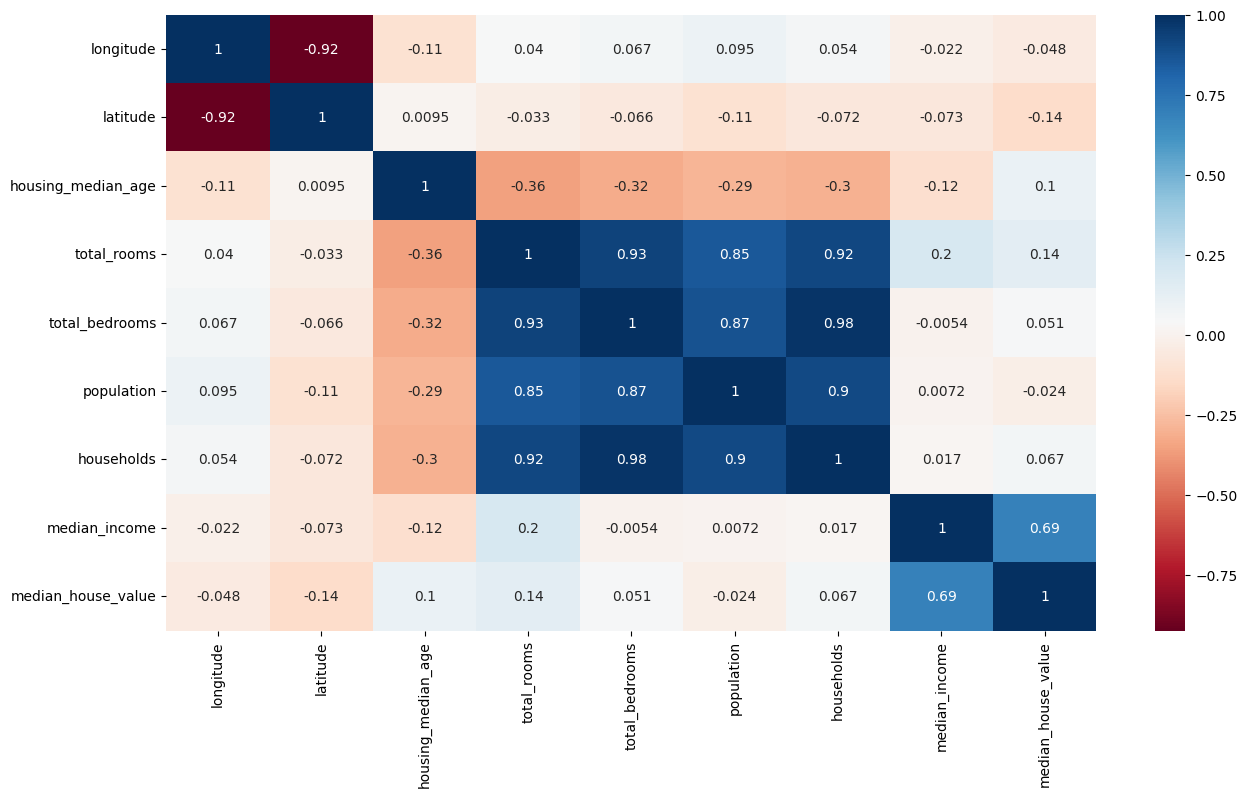

In [10]:
# Combining the features (X_train) and target variable (y_train) to create the training DataFrame (train_df)
train_df = X_train.join(y_train)

# Generating histograms to visualize the distribution of features in the training DataFrame
train_df.hist(figsize=(15, 8))
plt.show()

# Select only the numeric columns from the DataFrame
numeric_df = train_df.select_dtypes(include=[np.number])

# Plot the heatmap using the numeric DataFrame
plt.figure(figsize=(15, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="RdBu")
plt.show()

### 7. Feature Engineering

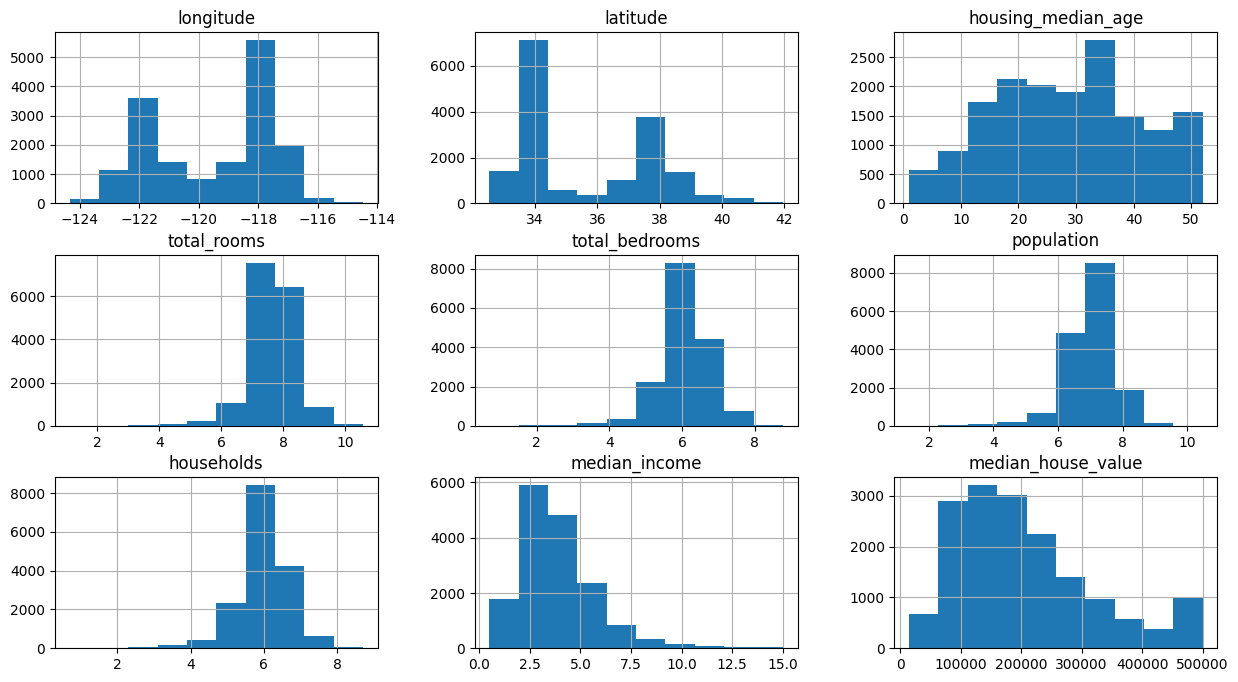

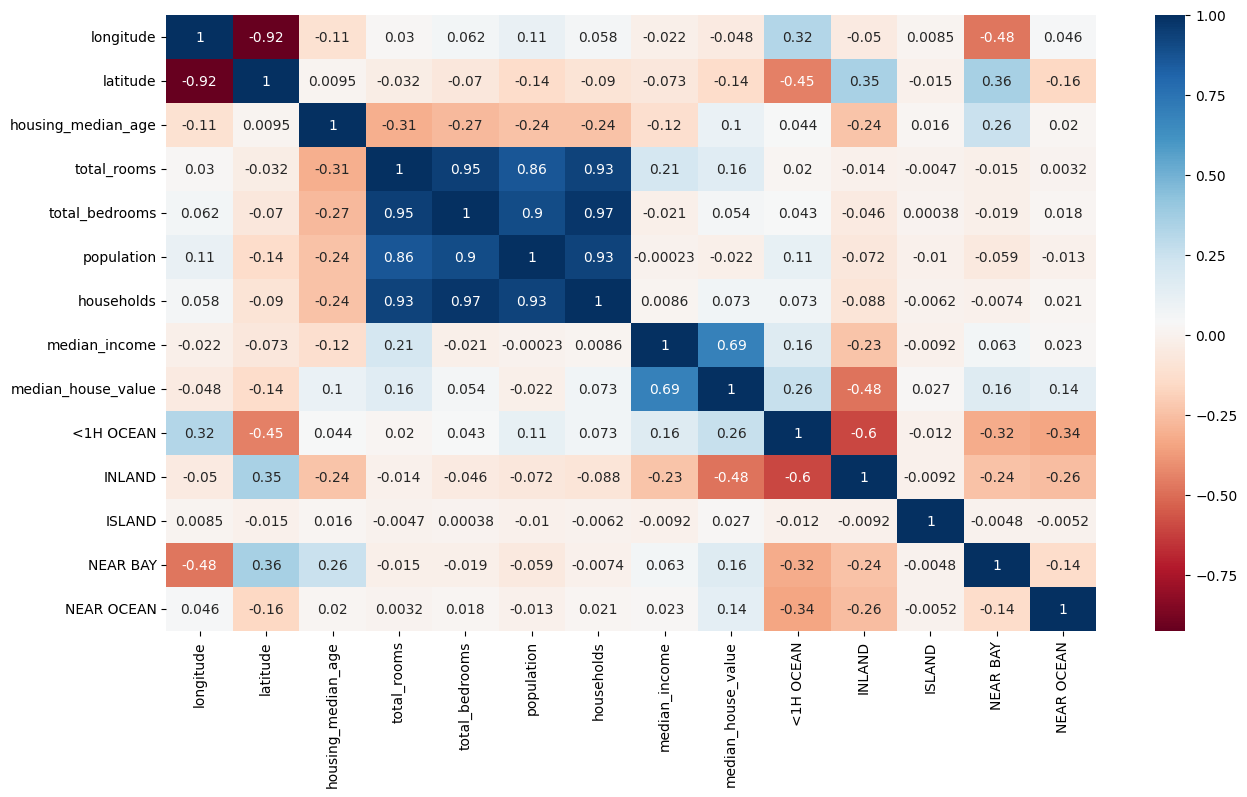

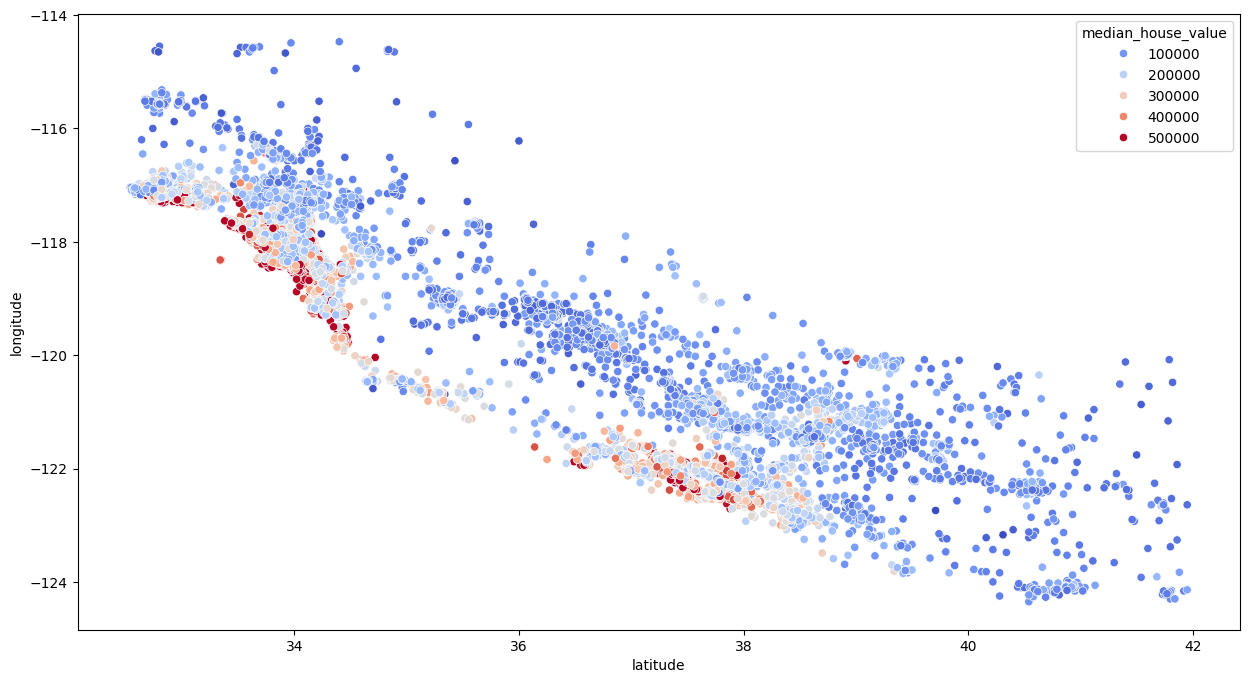

In [11]:
# Applying a logarithmic transformation to the 'total_rooms' column to normalize its distribution
train_df['total_rooms'] = np.log(train_df['total_rooms'] + 1)

# Applying a logarithmic transformation to the 'total_bedrooms' column to normalize its distribution
train_df['total_bedrooms'] = np.log(train_df['total_bedrooms'] + 1)

# Applying a logarithmic transformation to the 'population' column to normalize its distribution
train_df['population'] = np.log(train_df['population'] + 1)

# Applying a logarithmic transformation to the 'households' column to normalize its distribution
train_df['households'] = np.log(train_df['households'] + 1)

# Generating histograms to visualize the distribution of numerical features in the training DataFrame
train_df.hist(figsize=(15, 8))
plt.show()

# Counting the occurrences of each category in the 'ocean_proximity' column of the training DataFrame
train_df.ocean_proximity.value_counts()

# one-hot encoding on the categorical variable
train_df = train_df.join(pd.get_dummies(train_df.ocean_proximity)).drop(['ocean_proximity'], axis=1)

# Plot the heatmap using the numeric DataFrame
plt.figure(figsize=(15, 8))
sns.heatmap(train_df.corr(), annot=True, cmap="RdBu")
plt.show()

# Creating a scatter plot to visualize the geographical distribution of median house values
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", hue="median_house_value", data=train_df, palette="coolwarm")
plt.show()

### 8. Additional Feature Engineering

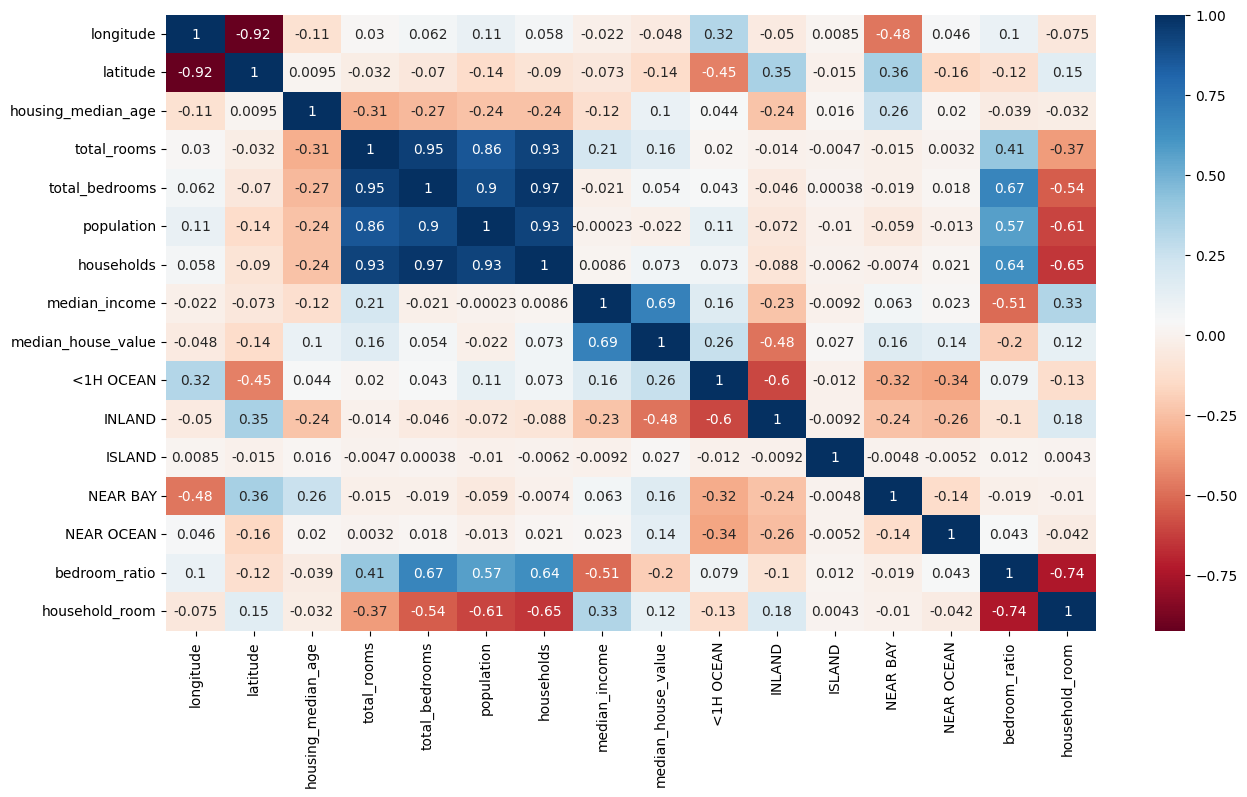

In [12]:
# Calculating the ratio of total bedrooms to total rooms and creating a new feature 'bedroom_ratio'
train_df["bedroom_ratio"] = train_df["total_bedrooms"] / train_df["total_rooms"]

# Calculating the ratio of total rooms to households and creating a new feature 'household_room'
train_df["household_room"] = train_df["total_rooms"] / train_df["households"]

# Plotting the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(train_df.corr(), annot=True, cmap="RdBu")
plt.show()

### 9. Training Models
Linear Regression

In [13]:
# Importing the Linear Regression model from scikit-learn
from sklearn.linear_model import LinearRegression

# Splitting the training dataset into features (independent variables) and target (dependent variable)
X_train, y_train = train_df.drop(['median_house_value'], axis=1), train_df['median_house_value']

# Initializing the Linear Regression model
lr = LinearRegression()

# Fitting the Linear Regression model to the training data
lr.fit(X_train, y_train)

# Creating a DataFrame 'test_df' by joining features (X_test) and target variable (y_test)
test_df = X_test.join(y_test)

# Applying logarithmic transformation to certain columns in 'test_df' for normalization
test_df['total_rooms'] = np.log(test_df['total_rooms'] + 1)
test_df['total_bedrooms'] = np.log(test_df['total_bedrooms'] + 1)
test_df['population'] = np.log(test_df['population'] + 1)
test_df['households'] = np.log(test_df['households'] + 1)

# Encoding categorical variable 'ocean_proximity' using one-hot encoding and dropping the original column
test_df = test_df.join(pd.get_dummies(test_df.ocean_proximity)).drop(['ocean_proximity'], axis=1)

# Creating new features 'bedroom_ratio' and 'household_room' in 'test_df'
test_df["bedroom_ratio"] = test_df["total_bedrooms"] / test_df["total_rooms"]
test_df["household_room"] = test_df["total_rooms"] / test_df["households"]

# Splitting the test dataset into features (independent variables) and target (dependent variable)
X_test, y_test = test_df.drop(['median_house_value'], axis=1), test_df['median_house_value']

# Evaluate the performance of the trained linear regression model on the test dataset
lr_score = lr.score(X_test, y_test)
print(f"Linear Regression R^2 Score: {lr_score:.2f}")

Linear Regression R^2 Score: 0.67


### 10. Using RandomForestRegressor for model training

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Train a random forest regression model using the training data
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)

# Evaluate the performance of the trained random forest model on the test dataset
forest_score = forest.score(X_test, y_test)
print(f"Random Forest R^2 Score: {forest_score:.2f}")


Random Forest R^2 Score: 0.82
